In [1]:
from IPython.display import display_javascript, display_html, display
import uuid

class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        elif isinstance(json_data, list):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json
        self.uuid = str(uuid.uuid4())
        
    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 150px; width:100%;"></div>'.format(self.uuid),
            raw=True
        )
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
          document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

In [2]:
from rsplib.drawgraph import draw_graph

In [3]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL, Task, URIRef

In [4]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [5]:
g = jasper.service().g

In [19]:
from IPython.display import display_html, Javascript, SVG, Image, display_svg,display_png


In [20]:
data, metadata = draw_graph(g, 'png')

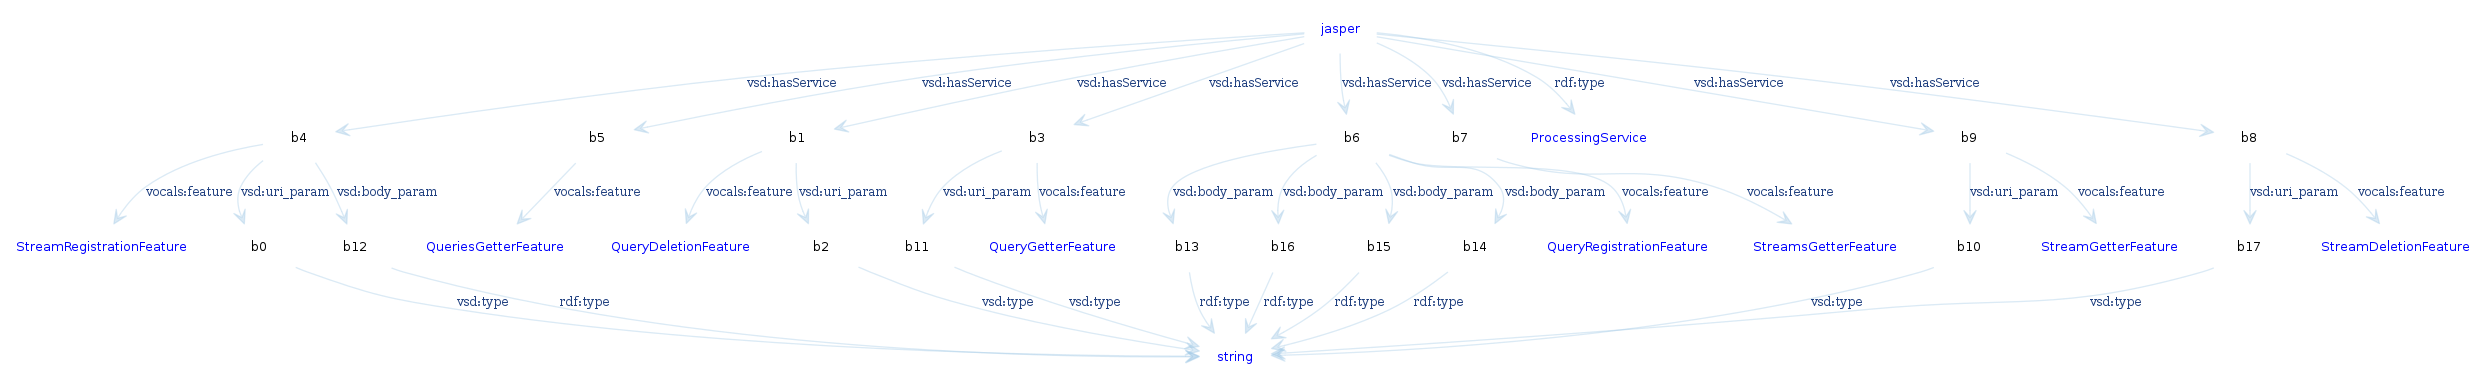

In [24]:
display_png(data['image/png'], raw=True)

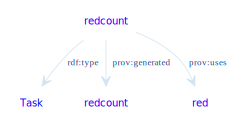

In [15]:
data, metadata = draw_graph(jasper.tasks()[0].g, 'svg')
display_svg(data['image/svg+xml'], raw=True)

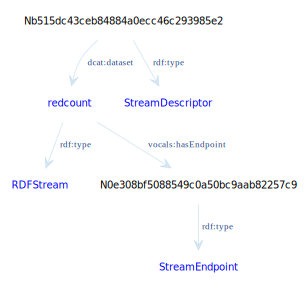

In [16]:
data, metadata = draw_graph(jasper.tasks()[0].stream().g, 'svg')
display_svg(data['image/svg+xml'], raw=True)